In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import pylab as plt
import h5py
import numpy as np
import pandas as pd
from activ.clustering.summarize import read_clustering_results, flatten_summarize, plot_line, plot_results
import scipy.signal as signal

In [2]:
path = "dead.ss90.u30_mean.iter250.h5"

In [3]:
_noc, _foc, _accuracy, _chance = read_clustering_results(path)

In [4]:
def plot_single(x, y, xlabel, ylabel, color='black', marker='-o'):
    #fig, ax = plt.subplots(figsize=(10,10))
    ax = plt.gca()
    _x, y_lower, y_med, y_upper = flatten_summarize(x, y)
    plot_line(_x, y_med, y_lower, y_upper, ax=ax, color=color, marker=marker)
    yticks = np.array([.2, .4, .6, .8, 1.0])
    ax.set_yticks(yticks)
    ret = ax.set_yticklabels((yticks*100).astype(np.int), fontdict={'fontsize':20})
    xticks = np.array([10, 20, 30, 40, 50])
    ax.set_xticks(xticks)
    ret = ax.set_xticklabels(xticks, fontdict={'fontsize':20})

    ax.set_ylabel(ylabel, fontdict={'fontsize':30})
    ax.yaxis.set_label_coords(-0.15, 0.5)

    ax.set_xlabel(xlabel, fontdict={'fontsize':30})
    ax.xaxis.set_label_coords(0.5, -0.12)
    plt.tight_layout()
    

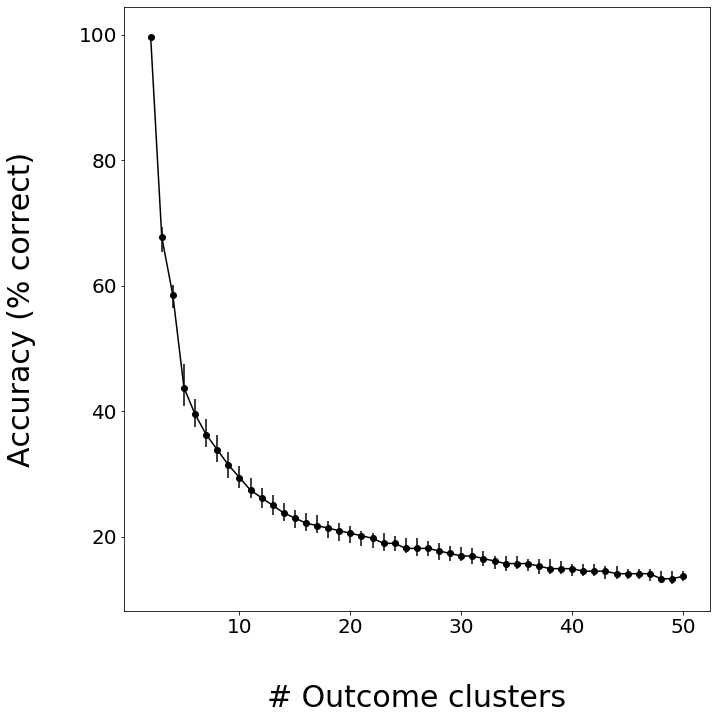

In [5]:
plt.figure(figsize=(10,10))
plot_single(_noc, _accuracy, "# Outcome clusters", "Accuracy (% correct)", 'black')
plt.savefig("results_summary/accuracy.png")

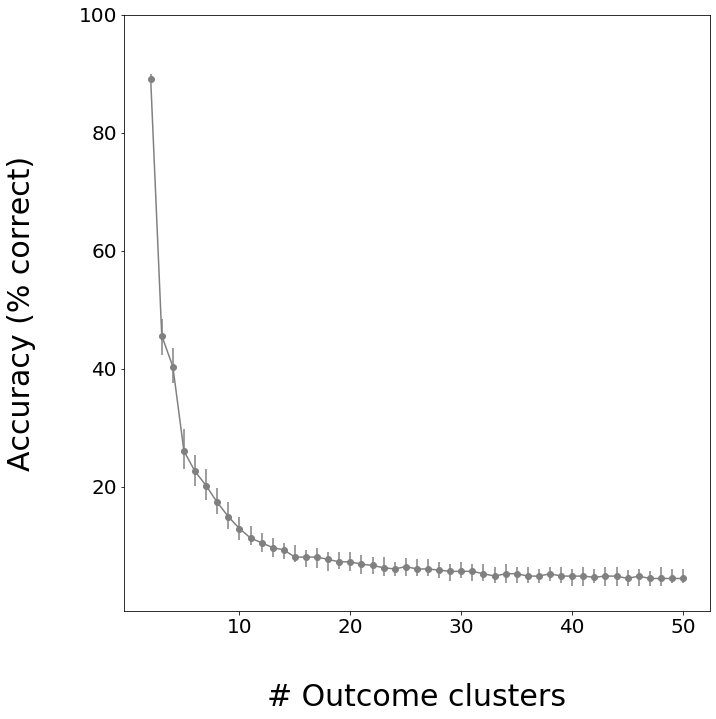

In [6]:
plt.figure(figsize=(10,10))
plot_single(_noc, _chance, "# Outcome clusters", "Accuracy (% correct)", 'gray')
plt.savefig("results_summary/chance.png")

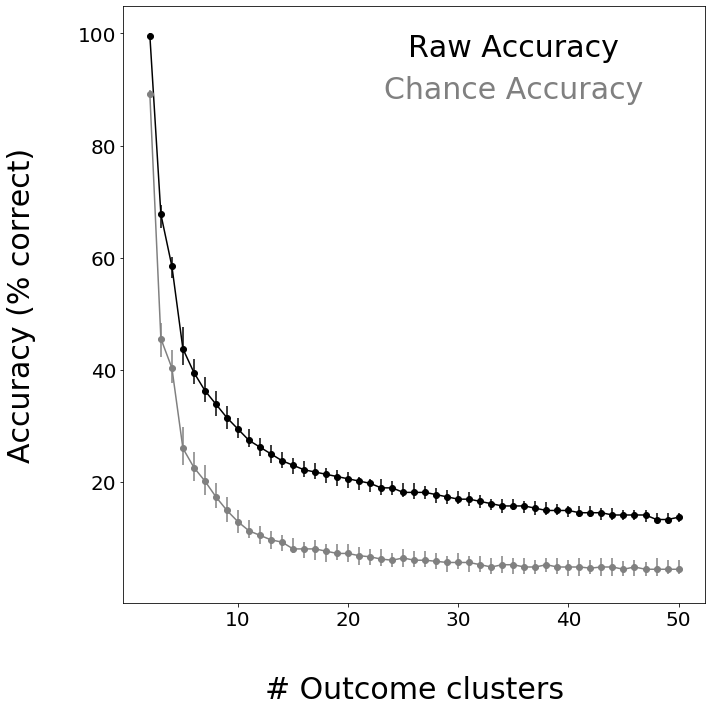

In [7]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,10))
ax=plt.gca()
_, acc_lower, acc_med, acc_upper = flatten_summarize(_noc, _accuracy)
plot_line(_noc, acc_med, lower=acc_lower, upper=acc_upper, ax=ax, color='black')
plot_single(_noc, _chance, "# Outcome clusters", "Accuracy (% correct)", 'gray')

y = 0.96
ax.text(35, y, 'Raw Accuracy', fontsize=30, color='black', horizontalalignment='center')
ax.text(35, y - 0.075, 'Chance Accuracy', fontsize=30, color='gray', horizontalalignment='center')


plt.tight_layout()
plt.savefig("results_summary/accuracy_and_chance.png")

<Figure size 7200x7200 with 0 Axes>

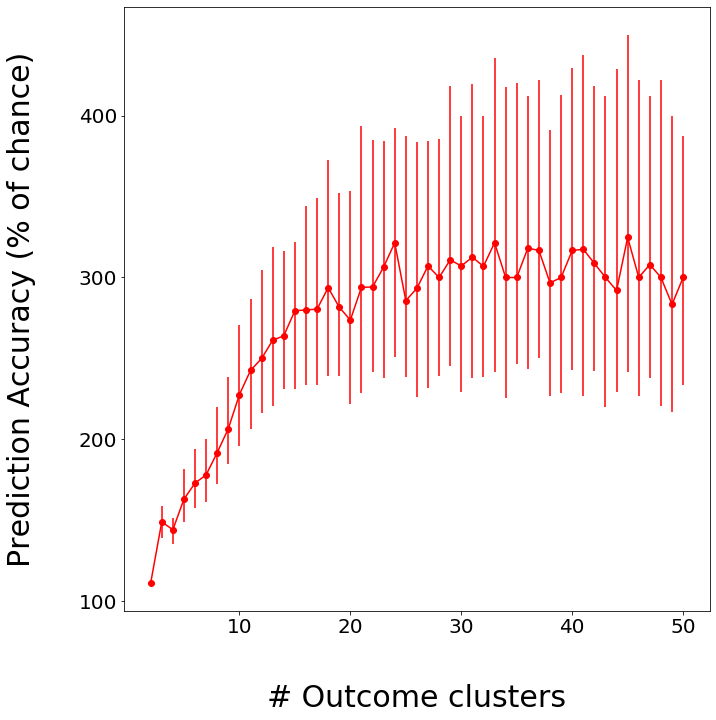

In [8]:
plt.figure(figsize=(100,100))
fig, ax = plt.subplots(figsize=(10,10))
cluster_sizes, foc_lower, foc_med, foc_upper = flatten_summarize(_noc, _foc)
plot_line(cluster_sizes, foc_med, foc_lower, foc_upper, ax=ax)
yticks = np.array([1, 2, 3, 4], dtype=np.int)
ax.set_yticks(yticks)
ret = ax.set_yticklabels(yticks*100, fontdict={'fontsize':20})
xticks = np.array([10, 20, 30, 40, 50])
ax.set_xticks(xticks)
ret = ax.set_xticklabels(xticks, fontdict={'fontsize':20})

ax.set_ylabel("Prediction Accuracy (% of chance)", fontdict={'fontsize':30})
ax.yaxis.set_label_coords(-0.15, 0.5)

ax.set_xlabel("# Outcome clusters", fontdict={'fontsize':30})
ax.xaxis.set_label_coords(0.5, -0.12)
plt.tight_layout()
plt.savefig("results_summary/fold_over_chance.png")

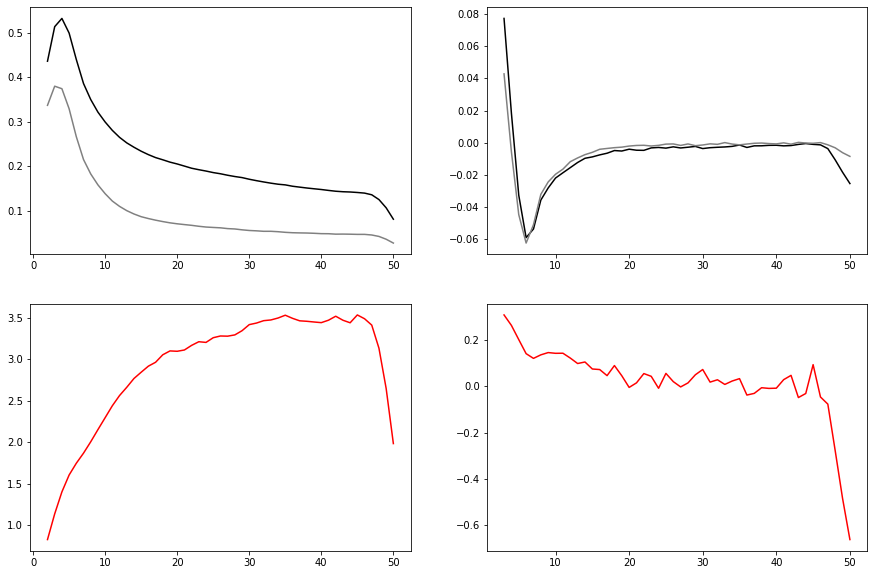

In [9]:
plt.figure(figsize=(15, 10))
def smooth(data, kernel=None):
    if kernel is None:
        w = 9
        kernel = signal.hann(w)
        c = w // 2
        kernel /= kernel.sum()
    else:
        c = len(kernel) // 2
    

    conv = np.convolve(data, kernel)
    return conv[c:-c]

def d1(data):
    return data[1:] - data[:-1]


_, acc_lower_sm, acc_med_sm, acc_upper_sm = flatten_summarize(_noc, _accuracy, smooth=True, filter_inf=False)
_, chc_lower_sm, chc_med_sm, chc_upper_sm = flatten_summarize(_noc, _chance, smooth=True, filter_inf=False)
_, foc_lower_sm, foc_med_sm, foc_upper_sm = flatten_summarize(_noc, _foc, smooth=True, filter_inf=False)

plt.subplot(2,2,1)
plot_line(cluster_sizes, acc_med_sm, marker='-', color='black')
plot_line(cluster_sizes, chc_med_sm, marker='-', color='gray')
plt.subplot(2,2,2)
plot_line(cluster_sizes[1:], d1(acc_med_sm), marker='-', color='black')
plot_line(cluster_sizes[1:], d1(chc_med_sm), marker='-', color='gray')


plt.subplot(2,2,3)
plot_line(cluster_sizes, foc_med_sm, marker='-')
plt.subplot(2,2,4)
plot_line(cluster_sizes[1:], d1(foc_med_sm), marker='-')

plt.savefig('results_summary/smooth_w_1d.png')

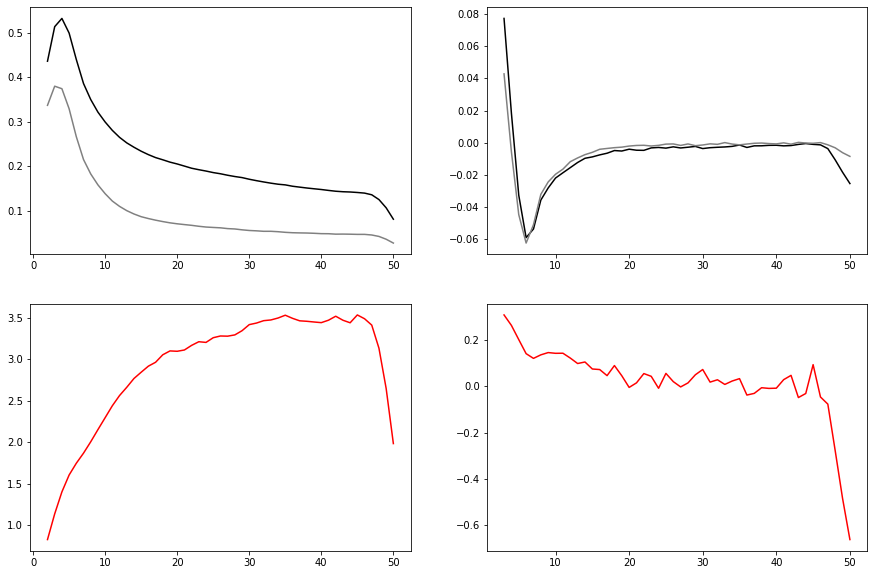

In [10]:
plt.figure(figsize=(15, 10))
def smooth(data, kernel=None):
    if kernel is None:
        w = 9
        kernel = signal.hann(w)
        c = w // 2
        kernel /= kernel.sum()
    else:
        c = len(kernel) // 2
    

    conv = np.convolve(data, kernel)
    return conv[c:-c]

def d1(data):
    return data[1:] - data[:-1]


_, acc_lower, acc_med, acc_upper = flatten_summarize(_noc, _accuracy, smooth=False, filter_inf=True)
_, chc_lower, chc_med, chc_upper = flatten_summarize(_noc, _chance, smooth=False, filter_inf=True)
_, foc_lower, foc_med, foc_upper = flatten_summarize(_noc, _foc, smooth=False, filter_inf=True)

cluster_sizes = _

plt.subplot(2,2,1)
plot_line(cluster_sizes, acc_med, marker='-', color='black')
plot_line(cluster_sizes, chc_med, marker='-', color='gray')
plt.subplot(2,2,2)
plot_line(cluster_sizes[1:], d1(acc_med), marker='-', color='black')
plot_line(cluster_sizes[1:], d1(chc_med), marker='-', color='gray')


plt.subplot(2,2,3)
plot_line(cluster_sizes, foc_med, marker='-')
plt.subplot(2,2,4)
plot_line(cluster_sizes[1:], d1(foc_med), marker='-')

plt.savefig('results_summary/unsmooth_w_1d.png')